#Loading Data

In [1]:
#importing libraries

import matplotlib
import matplotlib.pyplot as plt
import random

import pandas as pd
import numpy as np

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
#!curl --header 'Host: doc-08-3c-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --cookie 'AUTH_f2a3s1o42b8g35crk5oc04dket414mml_nonce=7d39bn9mmdemq' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-08-3c-docs.googleusercontent.com/docs/securesc/iag7nsppr0gd9sfg3kf3nt5k7klifi6v/v8a53ig6m0su9v54srlfvoet9scbn91m/1601037375000/00584139903400704852/00584139903400704852/1QSwIHxbn-DhInBQ9Q3CYV0W9VyeviEUO?e=download&authuser=0&nonce=7d39bn9mmdemq&user=00584139903400704852&hash=f3hcf6jbont2kd9u0pr3ch0370u9uc5s' --output 'falls.zip'
#!unzip /content/falls.zip
#!pip install seaborn --upgrade
import seaborn as sns

print(sns.__version__)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.3M    0 21.3M    0     0  25.4M      0 --:--:-- --:--:-- --:--:-- 25.4M
Archive:  /content/falls.zip
   creating: falls/
  inflating: falls/equip_failures_test_set.csv  
  inflating: falls/equip_failures_training_set.csv  
     |████████████████████████████████| 286kB 2.5MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
0.11.0


In [3]:
df = pd.read_csv("/content/falls/equip_failures_training_set.csv")

df.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


#Make dataset interpretable to machine

###Replace na with np.nan

In [4]:
"""Instead of nan value we have na, so we will replace na with np.nan"""

df = df.replace('na', np.NaN)
df.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,NaN,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


###Change data-type of dataframe

In [5]:
df.dtypes

id                           int64
target                       int64
sensor1_measure              int64
sensor2_measure             object
sensor3_measure             object
                             ...  
sensor105_histogram_bin7    object
sensor105_histogram_bin8    object
sensor105_histogram_bin9    object
sensor106_measure           object
sensor107_measure           object
Length: 172, dtype: object

In [6]:
"We could see that few coloumns are of int type, and other are of object type,So for using data we need to make them float data type"

df = df.astype("float32")
df.dtypes

id                          float32
target                      float32
sensor1_measure             float32
sensor2_measure             float32
sensor3_measure             float32
                             ...   
sensor105_histogram_bin7    float32
sensor105_histogram_bin8    float32
sensor105_histogram_bin9    float32
sensor106_measure           float32
sensor107_measure           float32
Length: 172, dtype: object

###Drop useless coloumn from feature

In [7]:
"""id coloumn is just index, we don't need it , so we will drop it"""
df = df.drop(["id"],axis=1)
df.head()

,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,0.0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.800049,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.760010,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.640015,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.080000,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.060059,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954

#Understanding dataframe in numerical way

###Getting count,mean,standard deviation, min, max ,25th ,50th and 75th percentile of each feature in data 

In [8]:
df.describe()

,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
count,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,59329.00,5.932900e+04,5.932900e+04,5.932900e+04,59355.00,5.937100e+04,5.937100e+04,5.560000e+04,5.935800e+04,5.937100e+04,59358.0,59411.0,5.935800e+04,5.941100e+04,57277.000000,5.937100e+04,5.937100e+04,5.937100e+04,57500.000000,57499.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,46192.000000,4.619200e+04,57497.000000,57276.000000,5.599200e+04,5.599200e+04,5.599200e+04,5.599400e+04,55993.000000,5.599300e+04,5.599200e+04,5.599100e+04,5.930900e+04,5.727600e+04,57274.000000,5.727400e+04,5.727400e+04,5.727300e+04,57273.000000,5.727400e+04,5.727400e+04,5.727700e+04,5.727600e+04,57277.000000,57277.000000,5.599300e+04,49761.000000,50447.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933432e+04,0.713189,3.560139e+08,1.906050e+05,6.819130,11.006818,2.216364e+02,9.757225e+02,8.606015e+03,8.859091e+04,4.370638e+05,1.108362e+06,1657742.50,4.993032e+05,3.556986e+04,5.114750e+03,1809868.50,9.016968e+03,1.143677e+03,9.794915e+02,5.913064e+04,9.328091e+04,3461039.5,3002433.5,1.004160e+06,4.423925e+05,0.496918,1.267365e+02,5.072043e+03,2.305804e+02,1117.824951,374.327393,1.221165e+04,1.019011e+04,1.097500e+04,7.225776e+03,1.056601e+04,1.119792e+05,1.078551e+06,...,13.416653,2.200715e+06,3123.969482,375.147125,2.718640e+03,5.609954e+03,4.707094e+03,3.724794e+04,39.938564,1.861313e+03,2.854177e+04,7.923227e+03,3.374526e+04,2.850757e+04,6958.558105,4.529292e+06,2.037564e+05,8.965170e+04,15402.870117,4.058508e+06,5.938076e+05,7.912056e+05,7.780176e+03,0.215759,1.567750,9.717066e+06,1353.105591,1452.153931,7.334044e+05,7.838662e+05,4.454741e+05,2.111192e+05,4.457212e+05,3.939359e+05,3.330492e+05,3.462631e+05,1.387275e+05,8.388868e+03,0.090579,0.212756
std,0.128069,1.454207e+05,3.479168,7.948017e+08,4.040431e+07,161.485977,209.747253,2.047733e+04,3.418985e+04,1.503654e+05,7.619542e+05,2.374370e+06,3.262711e+06,3909496.25,1.422749e+06,2.201329e+05,1.696080e+05,4185777.25,1.633030e+05,5.035184e+04,7.582600e+04,5.394254e+05,8.494514e+05,7790106.0,6819493.0,3.088464e+06,1.262477e+06,5.511872,1.100938e+04,1.195935e+05,1.579802e+04,6598.879395,1482.658569,4.544178e+05,5.351987e+05,4.282

#Exploratory Data Analysis

###Get the distribution of classes

Downhole failure is signified by target value = 1

Surface failure is signified by target value = 0

Text(0, 0.5, 'count')

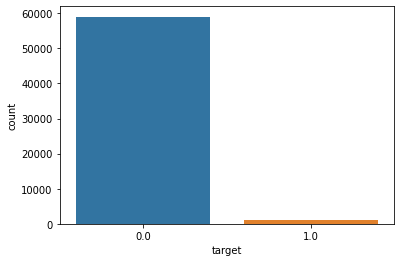

In [9]:
g = sns.countplot(x = "target" , data = df)
plt.xlabel("target")
plt.ylabel("count")

([<matplotlib.patches.Wedge at 0x7f906b3f5eb8>,
 [Text(-0.05756949701481714, -1.0984924911047236, '0'),
  Text(0.05756943916265415, 1.0984924941366225, '1')],
 [Text(-0.03140154382626389, -0.5991777224207583, '98.333'),
  Text(0.03140151227053862, 0.5991777240745213, '1.667')])

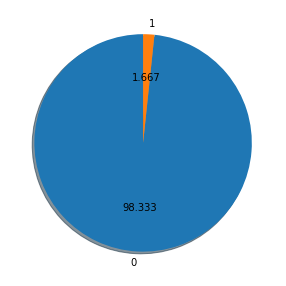

In [10]:
#Percentage view of data distribution

plt.figure(figsize=(5,5))
plt.pie(df['target'].value_counts(),startangle=90,autopct="%.3f",labels=[0,1],shadow=True)

98.333% data is of class 0

1.667% data is of class 1

That means most of the failure happen on surface

##Analysis between features and target

###Getting correlation of features with target

In [11]:
y = df["target"]
X = df.drop(labels="target" , axis=1)

coloumns = df.columns


In [12]:
def get_highly_correlated_feature(dataframe=df,correlation="pearson",top_features=10,with_="target"):
    """
    correlation can be {‘pearson’, ‘kendall’, ‘spearman’}
    top feature: it will give you top n correlated feature
    with: pass the coloumn name, with whome you want correlation
    datagrame: pass pandas dataframe
    """

    pearson_corr_dict = dataframe.corr(method=correlation)[with_].to_dict()
    
    #sorted_dict = dict(sorted(pearson_corr_dict.items(), key=lambda x: x[1], reverse=True))
    top_n_features = dict(sorted(pearson_corr_dict.items(), key=lambda x: abs(x[1]) , reverse=True)[:top_features])

    return top_n_features

top_n_features = get_highly_correlated_feature(dataframe=df,correlation="pearson",top_features=5,with_="target")
print(top_n_features)

{'target': 1.0, 'sensor27_measure': 0.5427437085929686, 'sensor47_measure': 0.5415981338770961, 'sensor46_measure': 0.5415981089669337, 'sensor45_measure': 0.5374521972709545}


###Univariate analysis

####Box plot of top 4 features

100%|██████████| 4/4 [00:00<00:00, 34.54it/s]


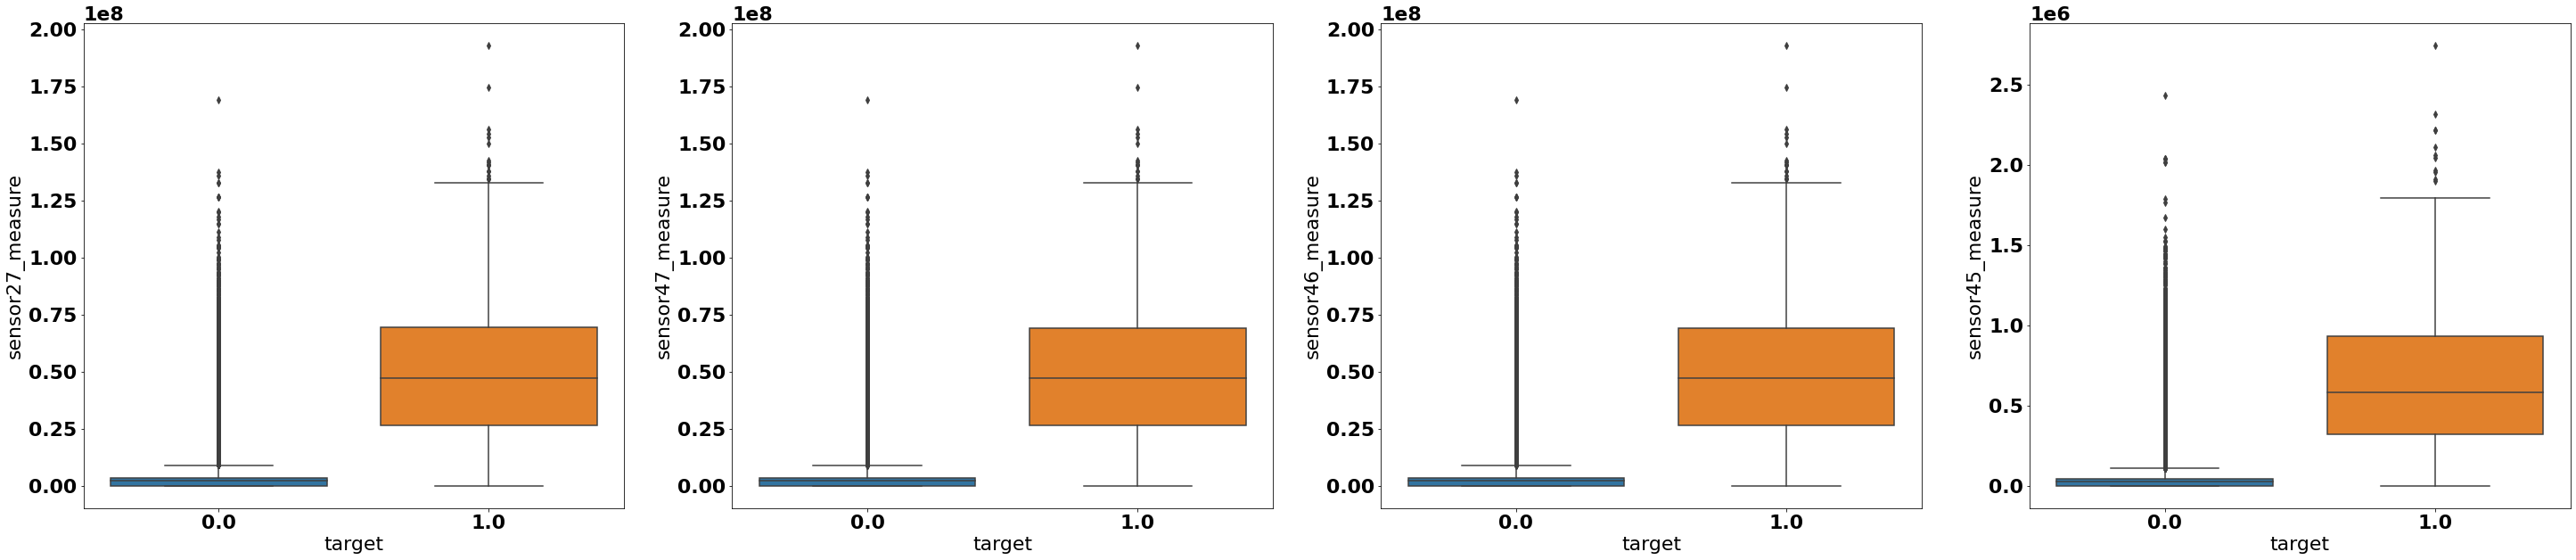

In [13]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


figure, axis = plt.subplots(1 , 4, figsize=(50, 10), squeeze=False)

top_coloumns = list(top_n_features.keys())[1:]



for i in tqdm(range(0,4)):

    sns.boxplot( x= "target",    y=top_coloumns[i]       , data=df   , orient='v'       , ax = axis[0,i])


**Observations:-**

*    Here we could see that highly correlated features are seperable
*    There is lot of outliers

**Conclusion:-**

*   We could use these top features to distinguish between our target
*   We need to handle outliers

###Bivariate analysis

In [14]:
""""Creating dataframe of coloumns that have higher potential to sperate both the classes"""

top_5_feature = list(get_highly_correlated_feature(dataframe=df,correlation="pearson",top_features=6,with_="target").keys())

Highly_Seperable = df.filter(top_5_feature, axis=1)

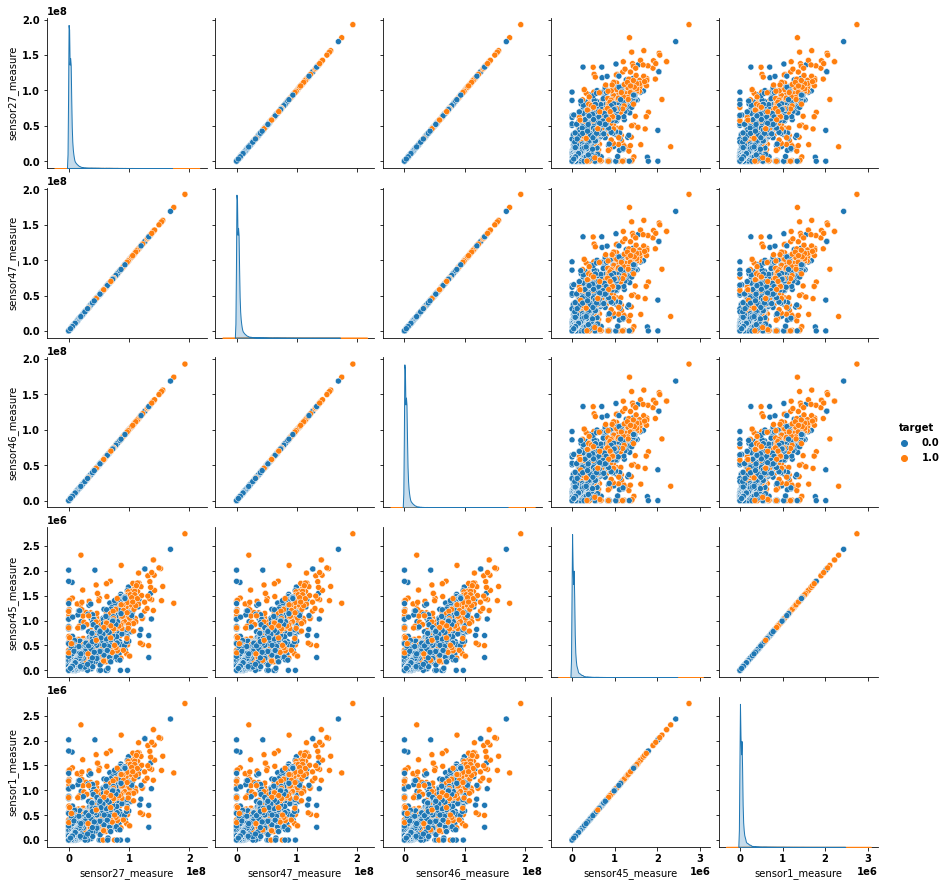

In [15]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

sns.pairplot(Highly_Seperable, hue="target")

**Observations**

*    We could see that few features are highly collinear


**Conclusion**

*    We need to remove highly correlated features

###Multivarriate analysis of data

In [16]:
df_without_nan = df.dropna()

Text(0.5, 1.0, 'Data_without_nan')

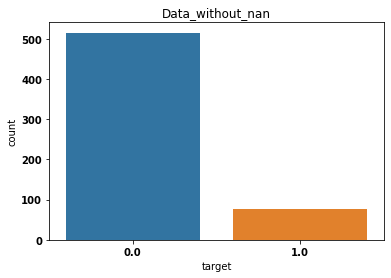

In [17]:
g = sns.countplot(x = "target" , data = df_without_nan)
plt.xlabel("target")
plt.ylabel("count")
plt.title("Data_without_nan")

####PCA 3d plot

In [18]:
X = df_without_nan.drop(["target"],axis=1)
target = df_without_nan["target"].tolist()

In [19]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.values)

x = pca_result[:,0]
y = pca_result[:,1]
z = pca_result[:,2]


In [20]:
import plotly.express as px

pca_df = pd.DataFrame(list(zip(x, y, z, target)), columns =['x', 'y', 'z', 'target']) 

fig = px.scatter_3d(pca_df, x='x', y='y', z='z',
              color='target')
fig.show()



**Observations**

*    From 3d plot we could see that, data is not completely seperable.

**Conclusion**

*    So we need to use most of the features, and we will also need to create new features.

##Analysis of nan values for each class

In [21]:
"""Create data frame for both the classes"""

df_1 = df[df["target"] == 1]
df_0 = df[df["target"] == 0]

###Count wise null plot for whole data, for class 1 and for class 0

In [22]:
"""These dictionary will contain number of null values for each coloumns"""

null = dict(df.isnull().sum())
null_1 = dict(df_1.isnull().sum())
null_0 = dict(df_0.isnull().sum())

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning:

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



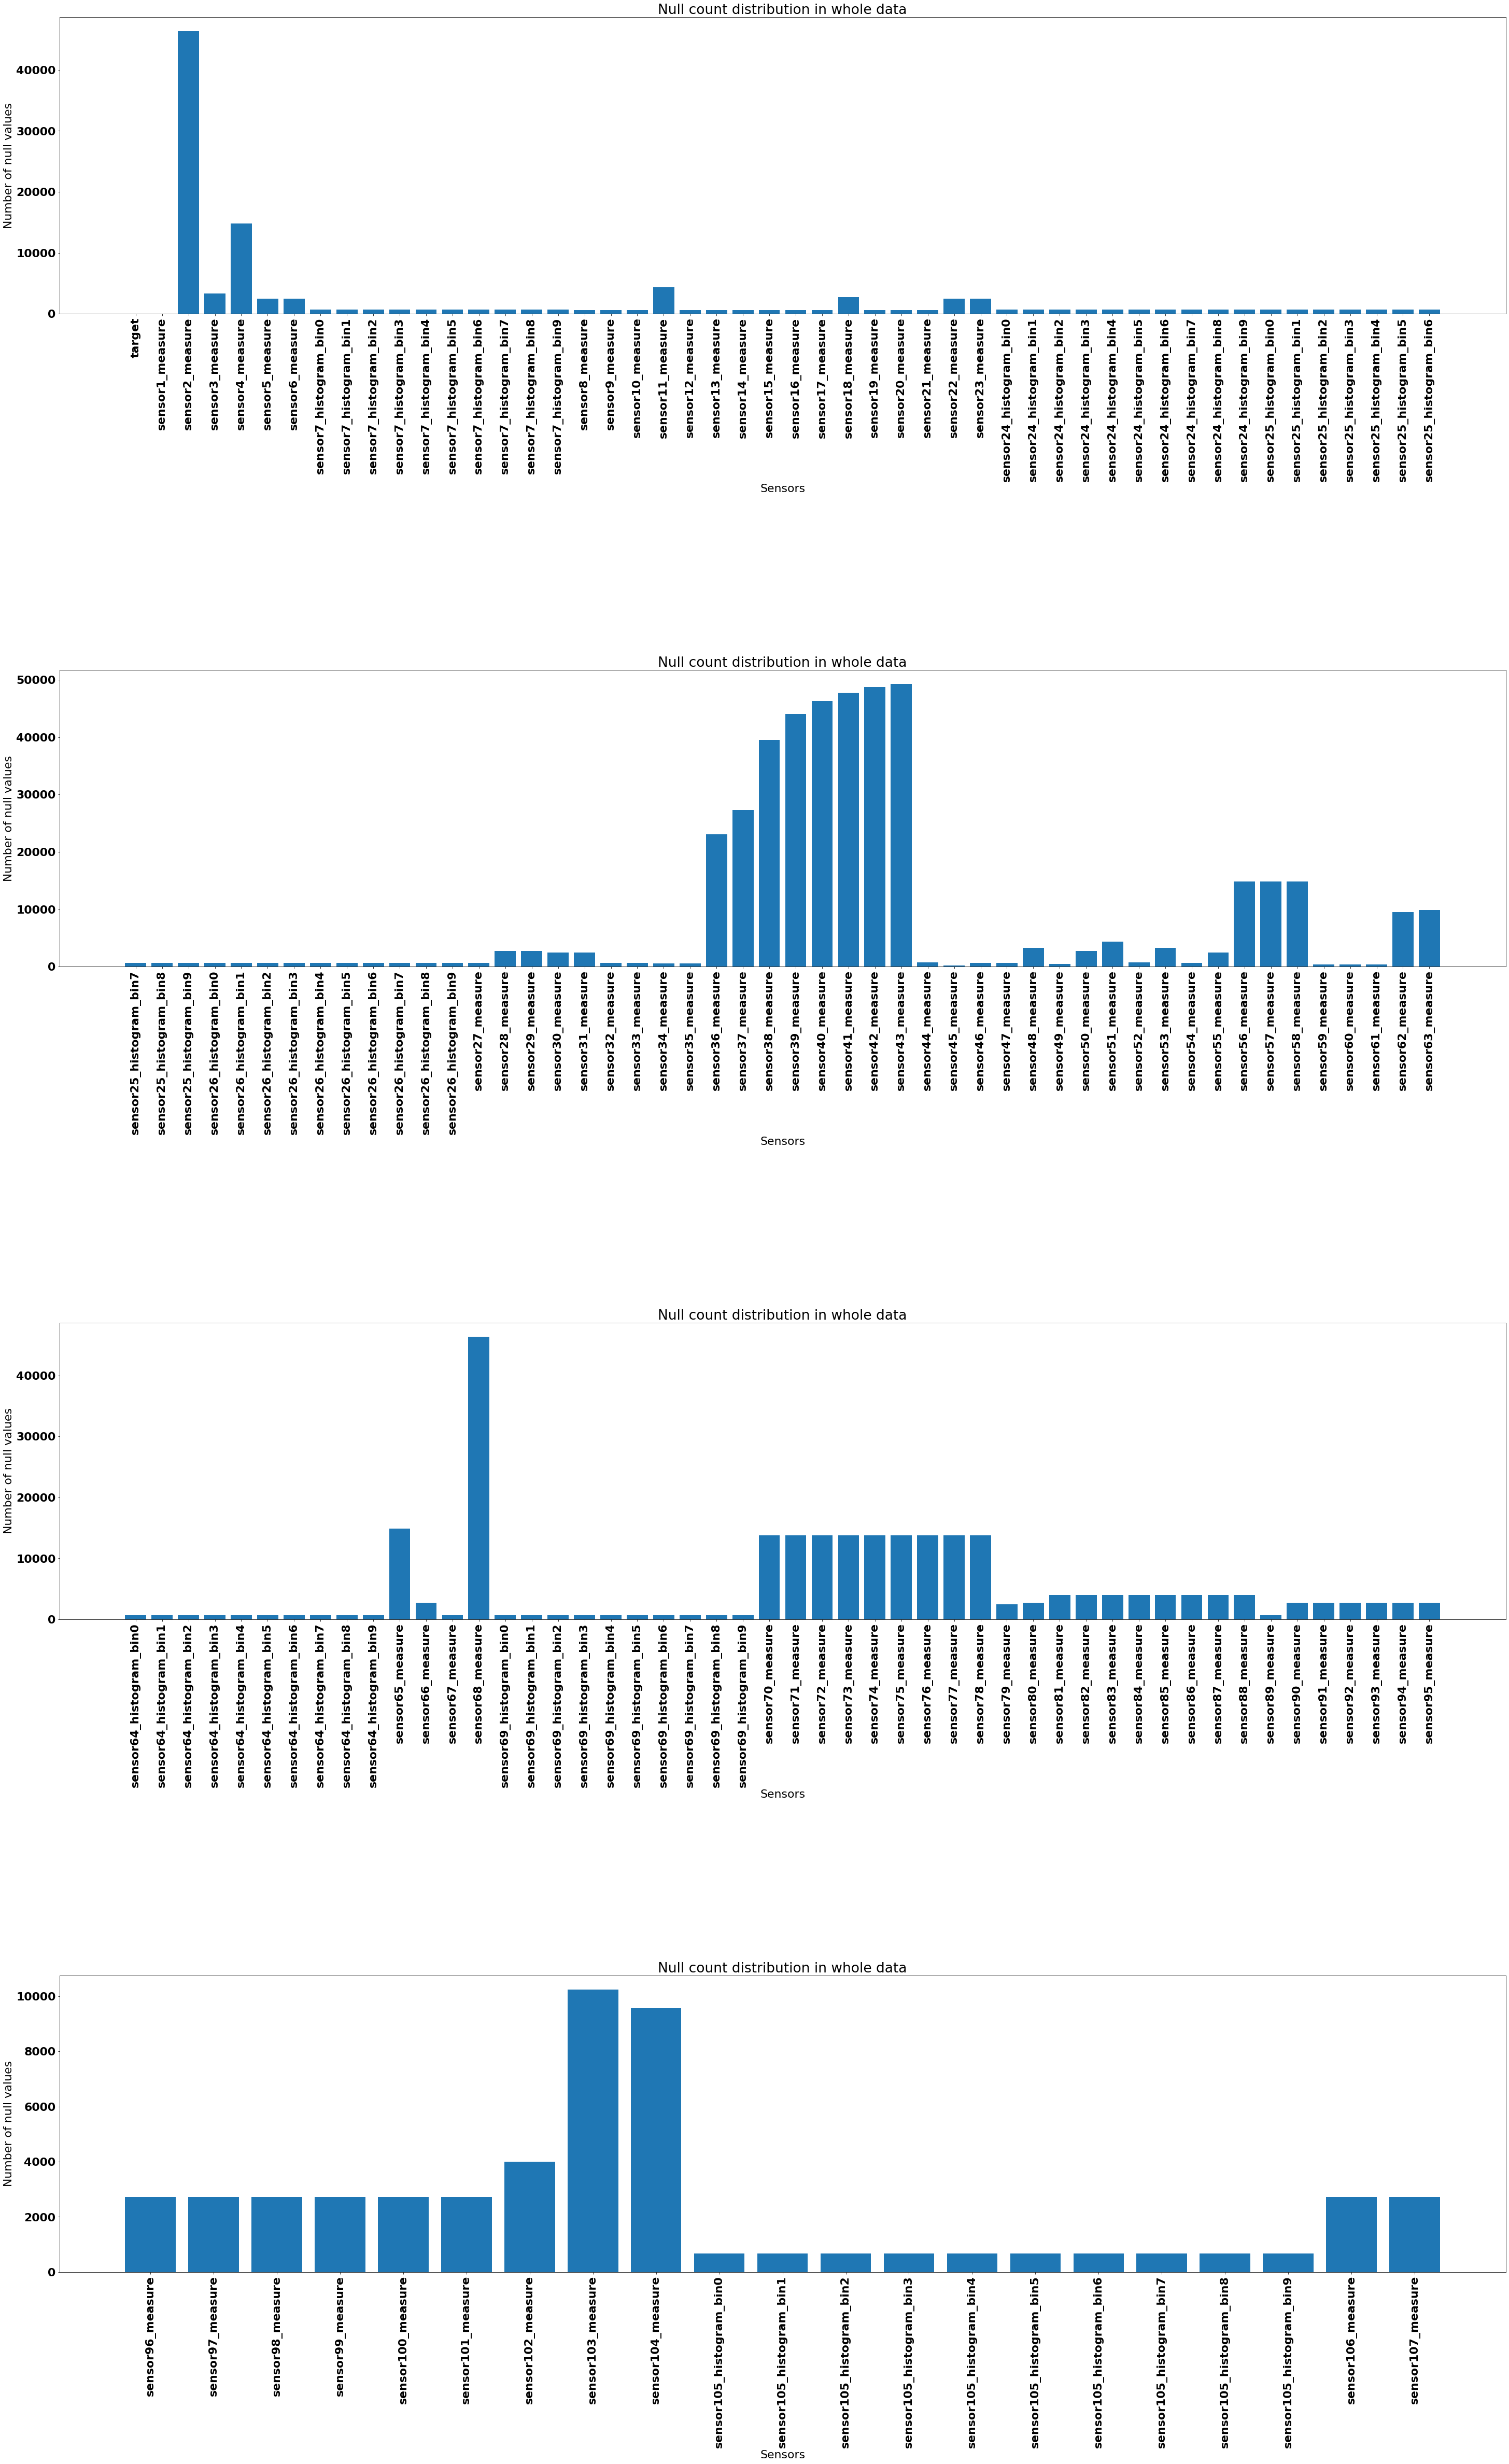

In [23]:
"""Null bar plot for whole data"""

coloumns = list(null.keys()) 
values = list(null.values())

col = []
val = []

col.append(coloumns[0:50])
val.append(values[0:50])

col.append(coloumns[50:100])
val.append(values[50:100])

col.append(coloumns[100:150])
val.append(values[100:150])

col.append(coloumns[150:171])
val.append(values[150:171])




figure, axis = plt.subplots(4, 1, figsize=(50, 80), squeeze=False)

for i in range(0,4):

    axis[i,0].bar(col[i], val[i]) 
    axis[i,0].set_xticks(range(len(col[i])), col[i])
    axis[i,0].set_xticklabels(col[i],rotation=90)
    axis[i,0].set_xlabel("Sensors") 
    axis[i,0].set_ylabel("Number of null values") 
    axis[i,0].set_title("Null count distribution in whole data") 


plt.subplots_adjust(hspace=1.2)
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning:

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



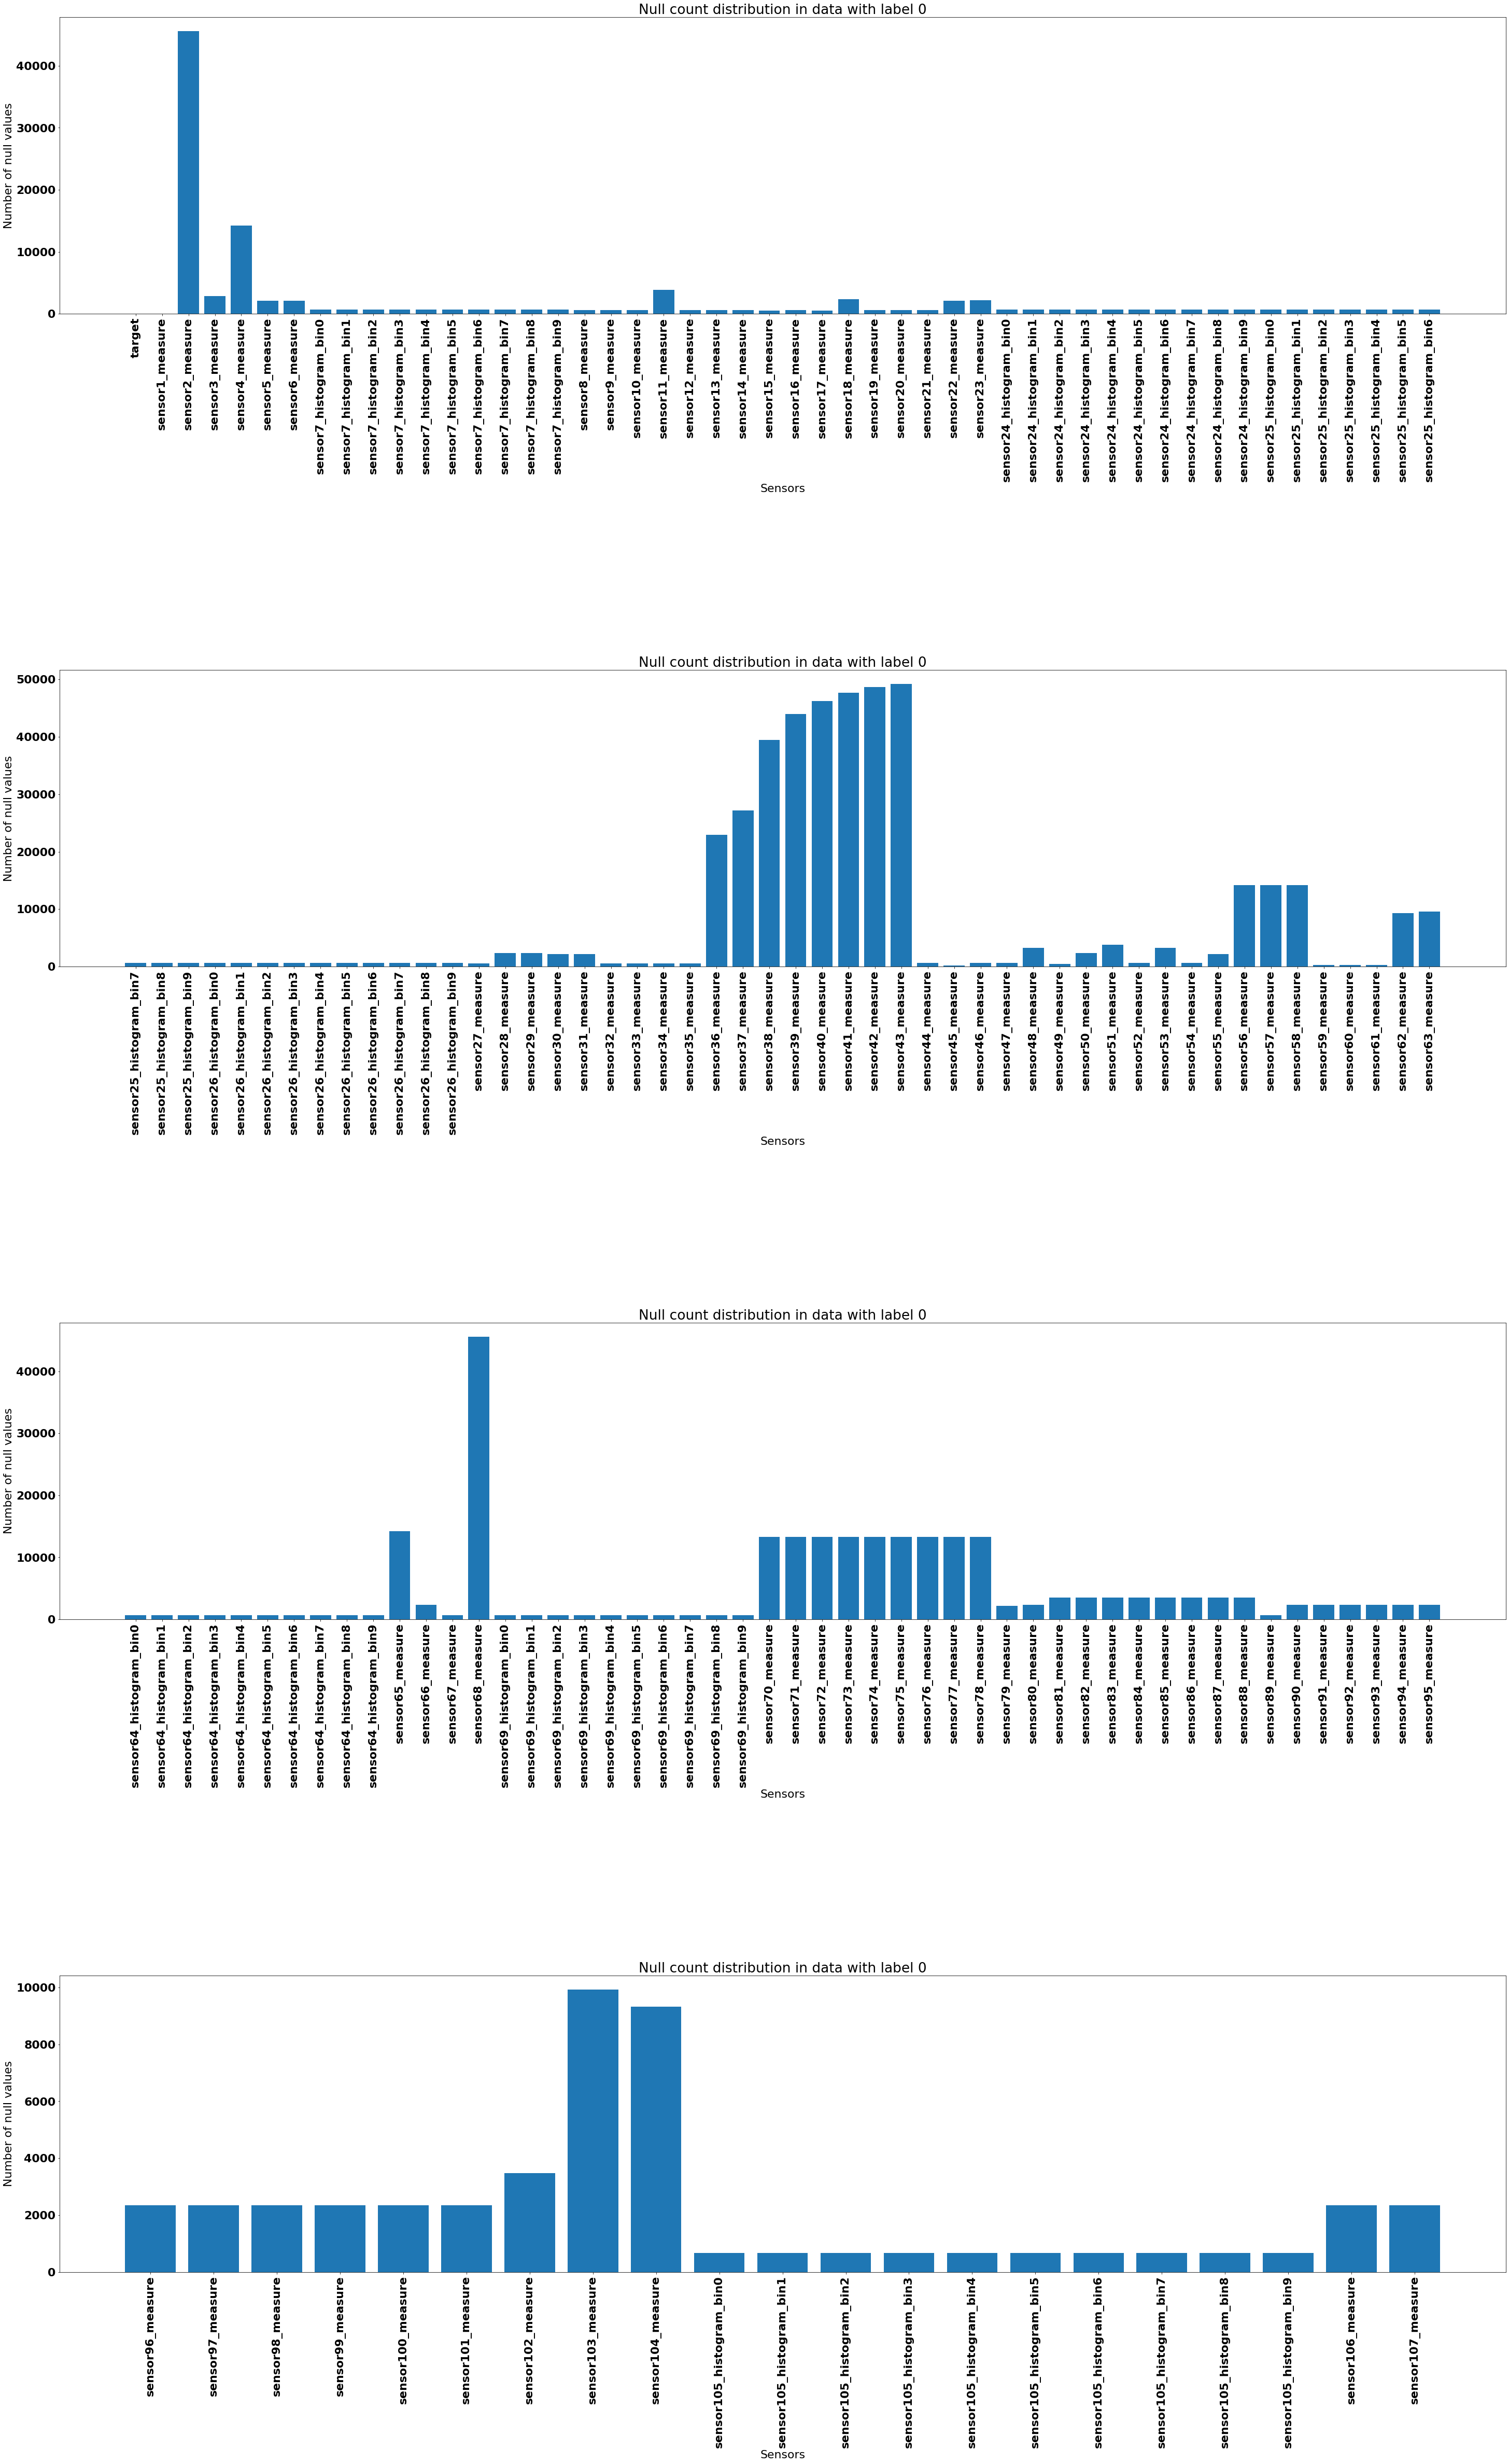

In [24]:
"""Null bar plot for whole data with label 0"""

coloumns = list(null_0.keys()) 
values = list(null_0.values())

col = []
val = []

col.append(coloumns[0:50])
val.append(values[0:50])

col.append(coloumns[50:100])
val.append(values[50:100])

col.append(coloumns[100:150])
val.append(values[100:150])

col.append(coloumns[150:171])
val.append(values[150:171])




figure, axis = plt.subplots(4, 1, figsize=(50, 80), squeeze=False)

for i in range(0,4):

    axis[i,0].bar(col[i], val[i]) 
    axis[i,0].set_xticks(range(len(col[i])), col[i])
    axis[i,0].set_xticklabels(col[i],rotation=90)
    axis[i,0].set_xlabel("Sensors") 
    axis[i,0].set_ylabel("Number of null values") 
    axis[i,0].set_title("Null count distribution in data with label 0") 


plt.subplots_adjust(hspace=1.2)
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning:

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



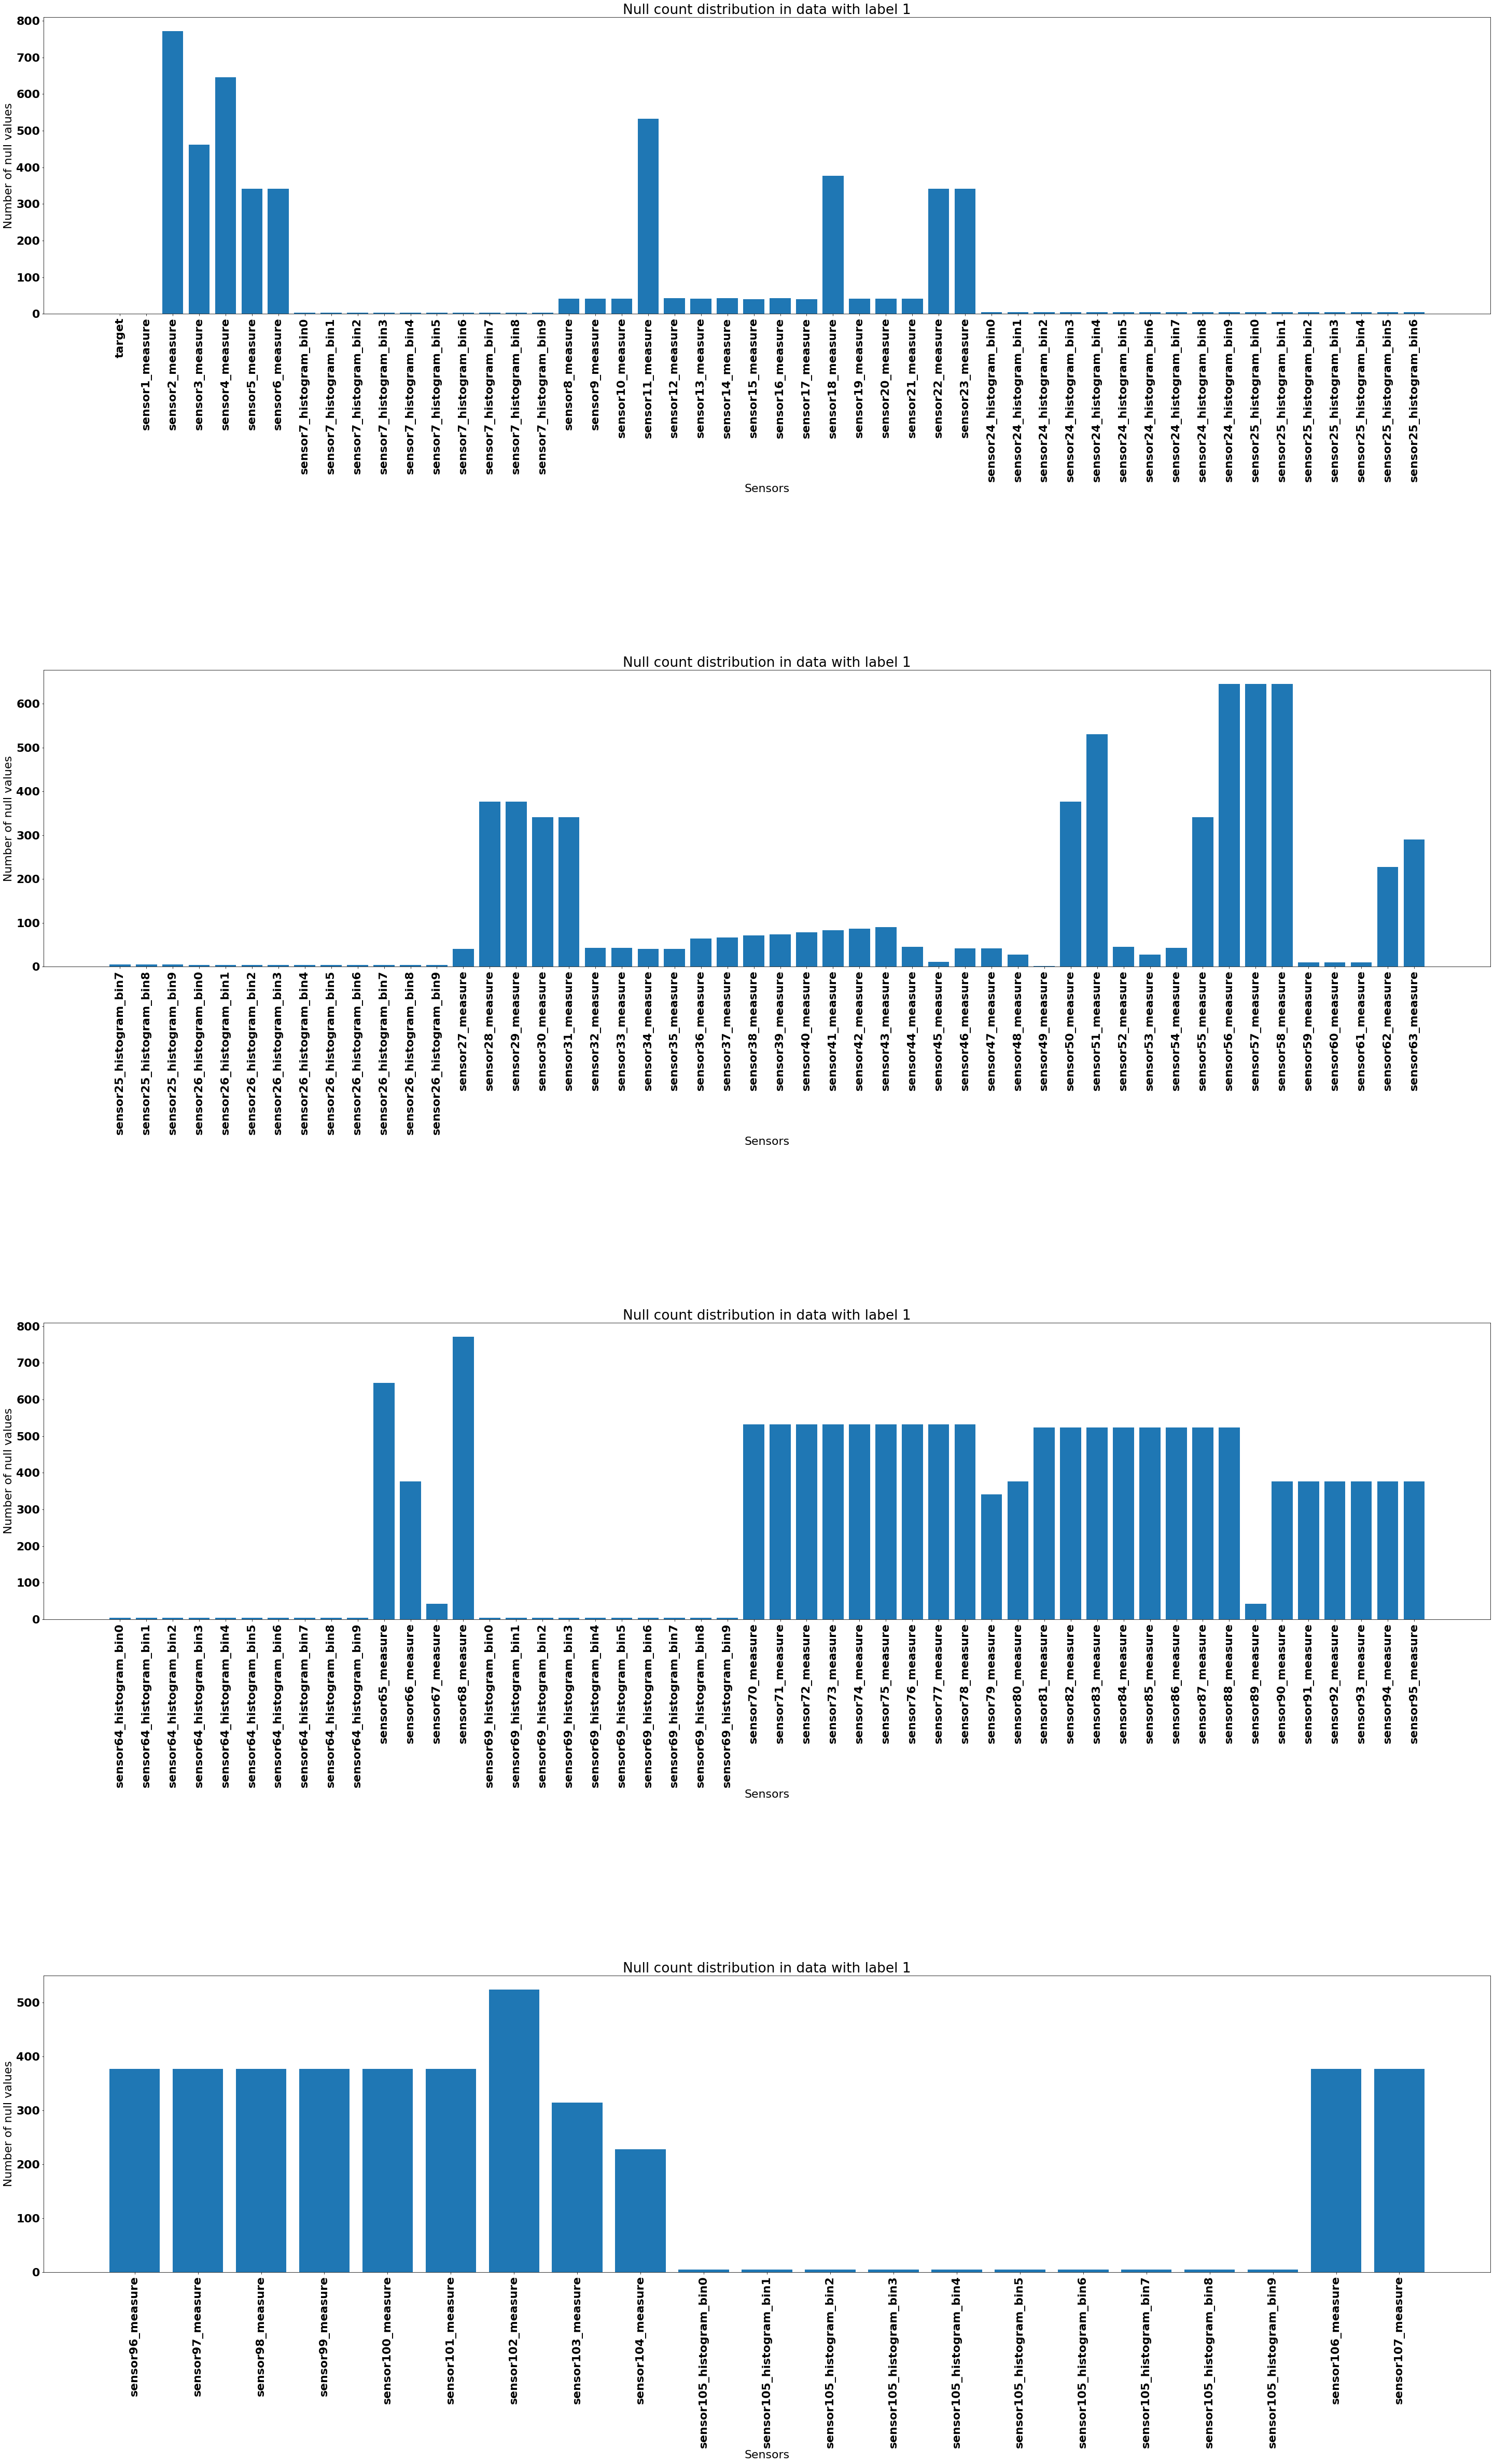

In [25]:
"""Null bar plot for whole data with label 1"""

coloumns = list(null_1.keys()) 
values = list(null_1.values())

col = []
val = []

col.append(coloumns[0:50])
val.append(values[0:50])

col.append(coloumns[50:100])
val.append(values[50:100])

col.append(coloumns[100:150])
val.append(values[100:150])

col.append(coloumns[150:171])
val.append(values[150:171])




figure, axis = plt.subplots(4, 1, figsize=(50, 80), squeeze=False)

for i in range(0,4):

    axis[i,0].bar(col[i], val[i]) 
    axis[i,0].set_xticks(range(len(col[i])), col[i])
    axis[i,0].set_xticklabels(col[i],rotation=90)
    axis[i,0].set_xlabel("Sensors") 
    axis[i,0].set_ylabel("Number of null values") 
    axis[i,0].set_title("Null count distribution in data with label 1") 


plt.subplots_adjust(hspace=1.2)
plt.show()



###Comaprision of percentage wise null values

In [26]:
"""Percentage wise stacked plot"""

null_percent   = {key: ((value/len(df))*100) for key, value in null.items()}
null_0_percent = {key: ((value/len(df_0))*100) for key, value in null_0.items()}
null_1_percent = {key: ((value/len(df_1))*100) for key, value in null_1.items()}

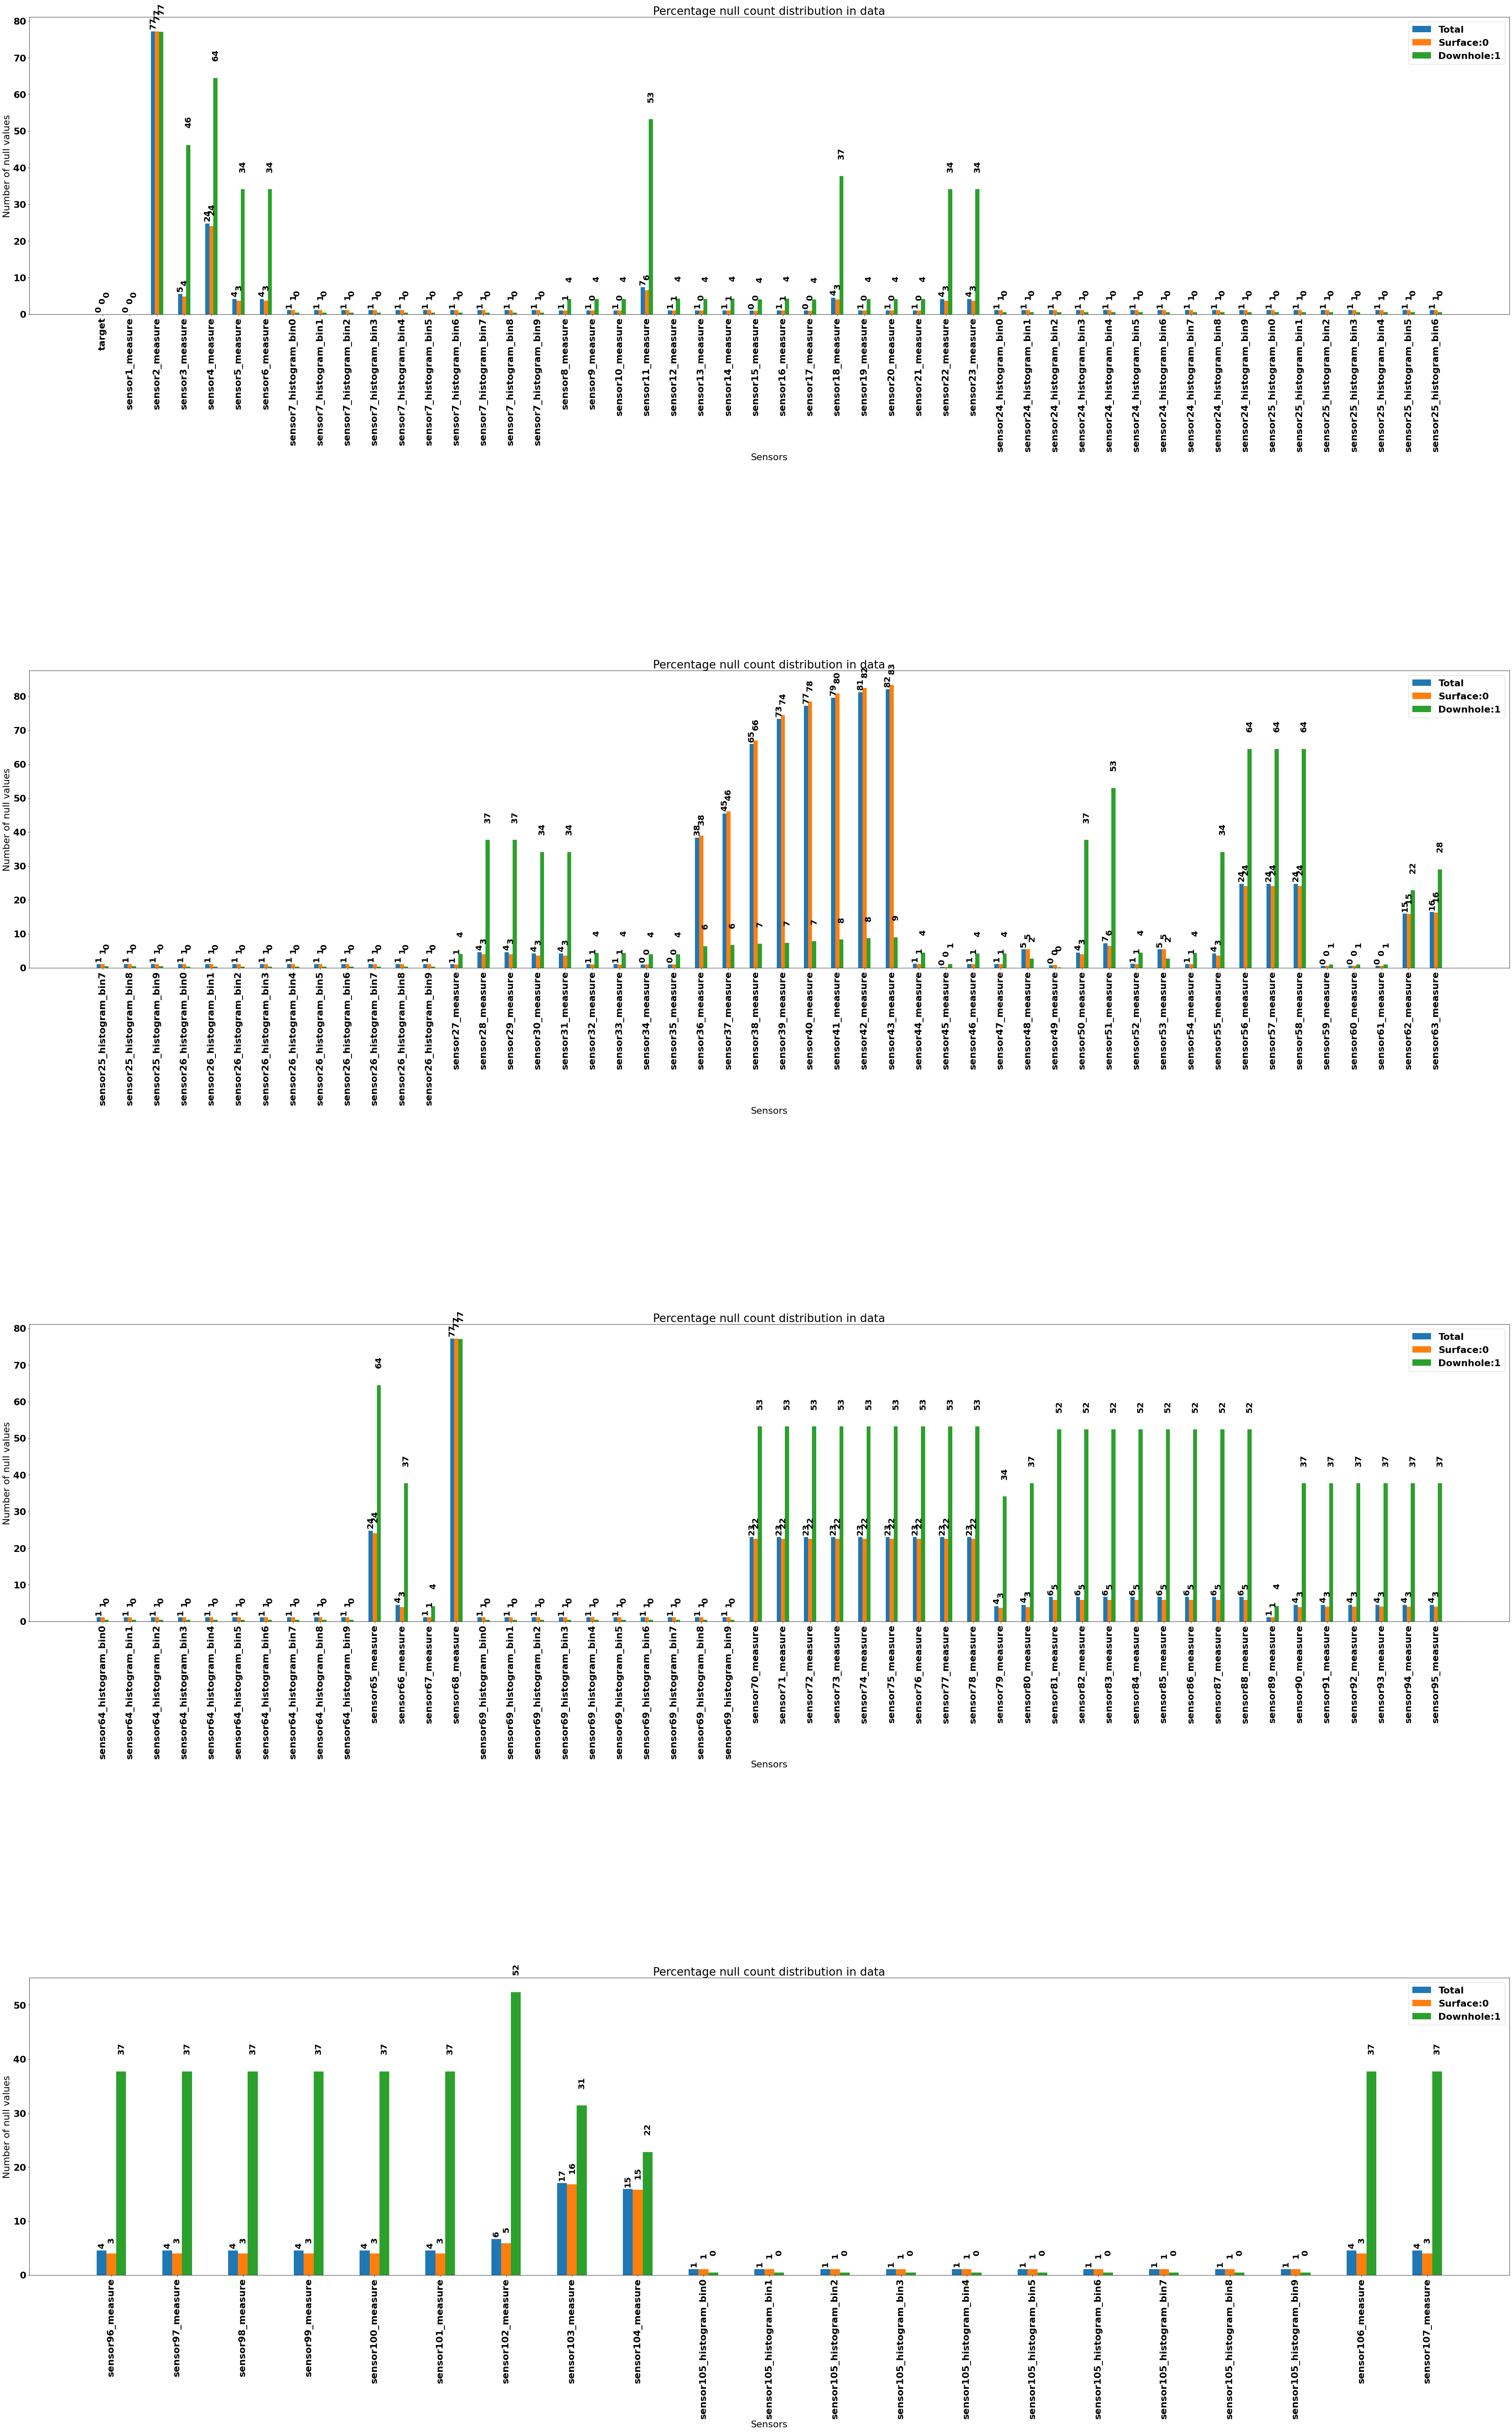

In [27]:
#https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py


coloumns = list(null_percent.keys()) 

values = list(null_percent.values())
values_0 = list(null_0_percent.values())
values_1 = list(null_1_percent.values())

col = []
val = []
val_0 = []
val_1 = []

col.append(coloumns[0:50])
val.append(values[0:50])
val_0.append(values_0[0:50])
val_1.append(values_1[0:50])

col.append(coloumns[50:100])
val.append(values[50:100])
val_0.append(values_0[50:100])
val_1.append(values_1[50:100])

col.append(coloumns[100:150])
val.append(values[100:150])
val_0.append(values_0[100:150])
val_1.append(values_1[100:150])

col.append(coloumns[150:171])
val.append(values[150:171])
val_0.append(values_0[150:171])
val_1.append(values_1[150:171])

rects = []

def autolabel(rects,i,loc):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axis[i,0].annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, loc),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',rotation=90,size=20)



figure, axis = plt.subplots(4, 1, figsize=(50, 80), squeeze=False)

for i in range(0,4):

    x = np.arange(len(col[i]))  # the label locations
    width = 0.15  # the width of the bars

    rects   =  axis[i,0].bar(x - (width)     , val[i]   ,width , label="Total")
    rects_0 =  axis[i,0].bar(x                   , val_0[i] ,width , label="Surface:0")
    rects_1 =  axis[i,0].bar(x  + (width)  , val_1[i] ,width , label="Downhole:1")
    
    axis[i,0].set_xticks(x)
    axis[i,0].set_xticklabels(col[i],rotation=90)
    axis[i,0].set_xlabel("Sensors") 
    axis[i,0].set_ylabel("Number of null values") 
    axis[i,0].set_title("Percentage null count distribution in data")
    axis[i,0].legend()
    
    autolabel(rects   , i , 5)
    autolabel(rects_0 , i , 25)
    autolabel(rects_1 , i , 40) 

figure.tight_layout()
plt.subplots_adjust(hspace=1.2)
plt.show()



**Observation**

*    In some coloumns nan distribution for downhole and surface is significantly diffrent

**Conclusion**

*    Nan values contain some information , so we can use nan values to distingush between the class

##Analysis of collinearty among feature

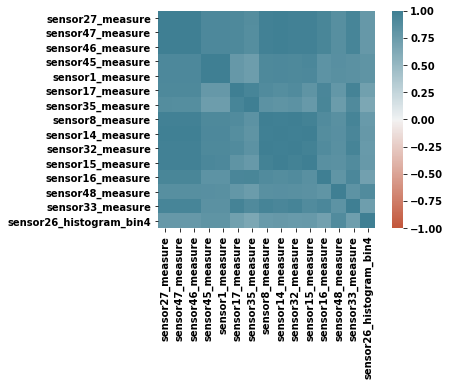

In [28]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)

top_15_feature = list(get_highly_correlated_feature(dataframe=df,correlation="pearson",top_features=16,with_="target").keys())[1:]

df_top_15 = df.filter(top_15_feature, axis=1)

top_15_features_correlation = df_top_15.corr(method="pearson")

cmap = sns.diverging_palette(20, 220, n=255, as_cmap=True)

ax = sns.heatmap(top_15_features_correlation , vmin=-1, vmax=1, center=0 ,cmap=cmap ,square=True)

**Observations**

*    Here we could see that , features that are highly correlated with class, they are correlated with themselves also

**Conclusion**

*    We need to remove highly correlated features, beacuse these features do not help in prediction of class

###Collinearty analysis among random features

In [29]:
coloumns = df.columns

def sampling_without_replacement(list_ = coloumns ,number_of_elements = 15):
    """
    pass list in first argument
    in second argument specify the number of elements you want

    it will return list of randomly, non repeated elements of given list
    """

    selected = []

    while(len(selected) < number_of_elements):
      selected.append(random.choice(list_))

      selected = list(set(selected))

    return selected

selected_15 = sampling_without_replacement(list_ = coloumns ,number_of_elements = 15)



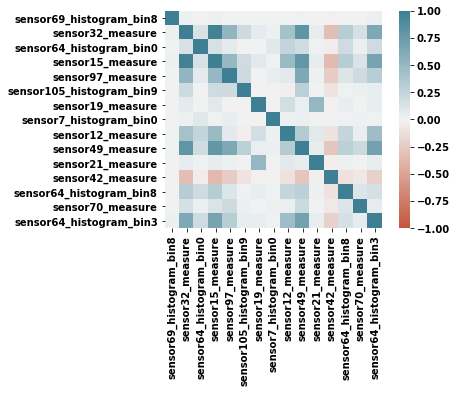

In [30]:
df_selected_15 = df.filter(selected_15, axis=1)

selected_15_features_correlation = df_selected_15.corr(method="pearson")

cmap = sns.diverging_palette(20, 220, n=255, as_cmap=True)

ax = sns.heatmap(selected_15_features_correlation , vmin=-1, vmax=1, center=0 ,cmap=cmap ,square=True)

**Observation**

*    few features are highly correlated, few features have very less correlation, and few are negatively correlated with each other.

**Conclusion**

*    We got all type data, this is good for model.